In [7]:
import os
import glob
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
path = '../results'
summary_dct = {}
test_results_dct = {}

for folder in os.listdir(path):
    for filename in glob.glob(os.path.join(path +"/" + folder + "/result_outputs", 'summary.csv')):
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            summary_dct['%s' % folder] = list(reader)
    for filename in glob.glob(os.path.join(path +"/" + folder + "/result_outputs", 'test_summary.csv')):
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            test_results_dct['%s' % folder] = list(reader)

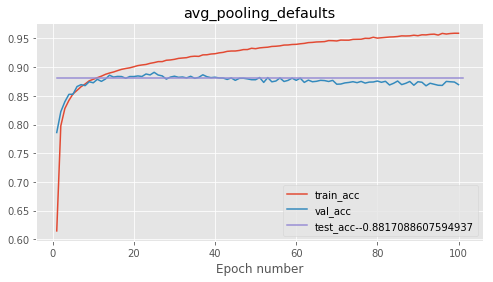

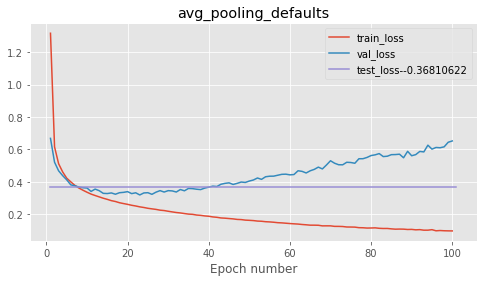

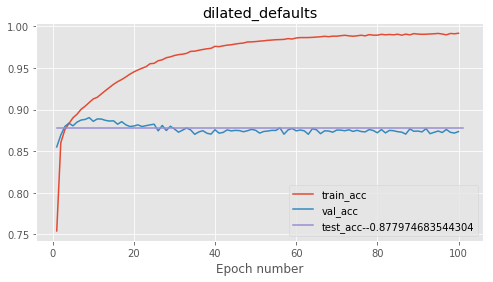

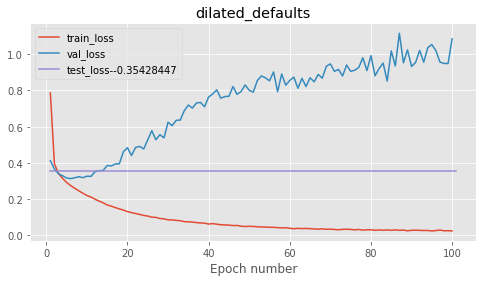

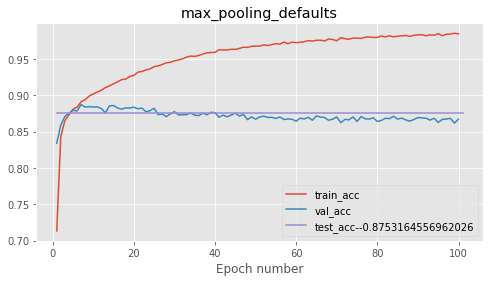

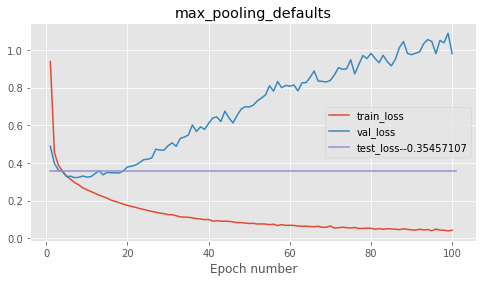

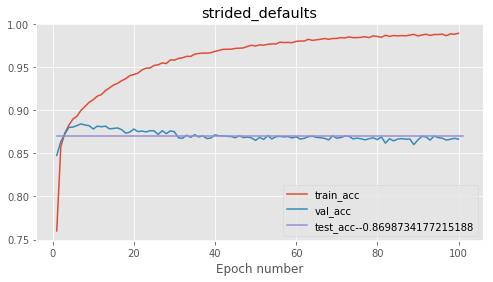

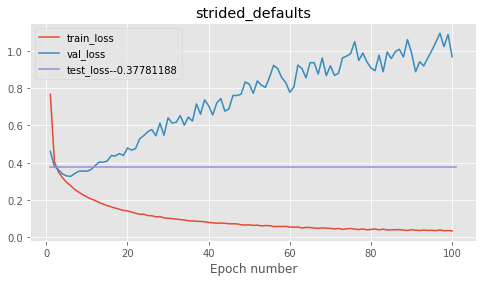

In [9]:
for filename in os.listdir(path): 
    data = summary_dct.get(filename)
    test_data = test_results_dct.get(filename)
    
    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []

    for i in data[1:]:
        train_acc.append(float(i[0]))
        train_loss.append(float(i[1]))
        val_acc.append(float(i[2]))
        val_loss.append(float(i[3]))

    plot_data = []
    plot_data.append(train_acc)
    plot_data.append(train_loss)
    plot_data.append(val_acc)
    plot_data.append(val_loss)
    #
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)

    for sub in np.arange(2):
        ax_1.plot(np.arange(1, len(data)), plot_data[sub*2], label=data[0][sub*2])
    ax_1.plot([1, len(data)], [float(test_data[1][0]), float(test_data[1][0])], label= "{}--{}" .format(test_data[0][0],test_data[1][0])) 
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title(filename)

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for sub in np.arange(2):
        ax_2.plot(np.arange(1, len(data)), plot_data[sub*2+1], label=data[0][sub*2+1])
    ax_2.plot([1, len(data)], [float(test_data[1][1]), float(test_data[1][1])], label= "{}--{}" .format(test_data[0][1],test_data[1][1])) 
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title(filename)
    plt.show()